In [34]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import diptest.diptest

%matplotlib inline

In [56]:
from numpy.random import choice

In [35]:
dat = np.random.normal(size=200)
dat2 = np.random.normal(loc=4, size=200)
datC = np.concatenate([dat, dat2])

(array([ 13.,  42.,  68.,  59.,  16.,  25.,  65.,  64.,  35.,  13.]),
 array([-2.19832131, -1.34468934, -0.49105738,  0.36257459,  1.21620655,
         2.06983852,  2.92347049,  3.77710245,  4.63073442,  5.48436638,
         6.33799835]),
 <a list of 10 Patch objects>)

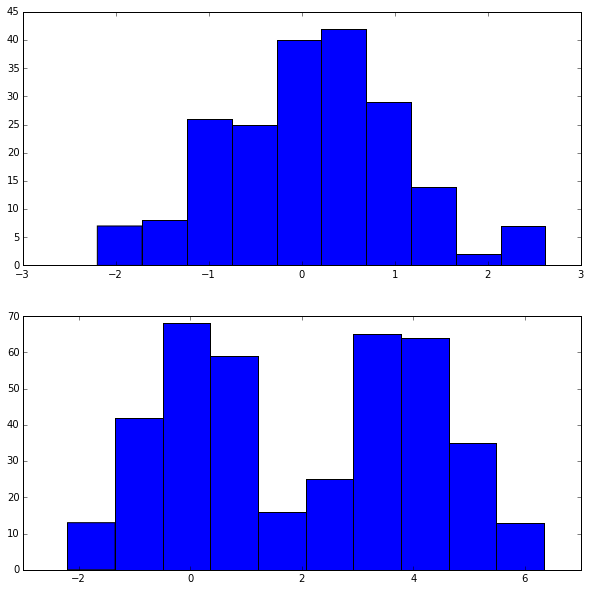

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.hist(dat)
ax2.hist(datC)

In [37]:
diptest.diptest.dip(dat)

0.024452205195297422

In [38]:
diptest.diptest.diptest(dat)

(0.024452205195297422, 0.5844568957084415)

In [39]:
diptest.diptest.diptest(datC)

(0.05981391482178594, 0.0)

Try it on data

In [40]:
import tapeAnalyst.analysis as analysis
import tapeAnalyst.gel_processing as gp

In [140]:
dfS = pd.read_csv('/Users/fearjm/devel/tapeAnalyst/data/JH_sample.csv', encoding='ISO-8859-1')
dfS.columns = ['wellID', 'conc', 'description', 'alert', 'notes']

In [141]:
gel = gp.TapeStationGel('/Users/fearjm/devel/tapeAnalyst/data/JH_gel.png', dfS)

In [182]:
lane = gel.lanes[23]

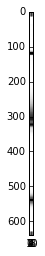

In [183]:
plt.imshow(lane.lane, cmap='Greys')

In [184]:
sec = lane.laneMean[140:400]

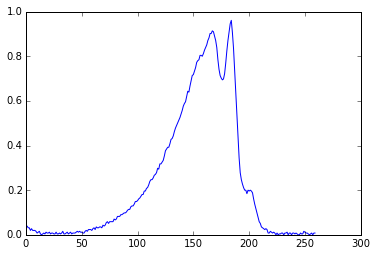

In [185]:
plt.plot(sec)

In [186]:
diptest.diptest.diptest(sec)

(0.04038461538461539, 0.003995941809977865)

In [187]:
import scipy.signal as signal
from ipywidgets import interact, IntSlider

(0.032071659026875476, 0.045377440615380404)


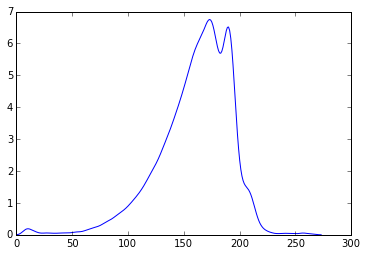

In [188]:
@interact(ham=IntSlider(15, min=1, max=100))
def ppl(ham):
    smooth = signal.convolve(sec, signal.hamming(ham))
    plt.plot(smooth)
    print(diptest.diptest.diptest(smooth))

In [189]:
diptest.diptest.diptest(lane.lane.ravel())

(0.04225352112676056, 0.0)

In [190]:
norm = sec / sec.mean()

In [191]:
norm = sec / sec.sum()

In [192]:
diptest.diptest.diptest(choice(np.arange(sec.shape[0]), p=norm, size=10000))

(0.013314583333333326, 0.0)